<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/SVM%20and%20LR/Mini-Lab_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contributors
* Tadd Backus
* Kendall Scott
* Austin Webb
* Milan Patel


In [1]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [2]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier

pd.set_option('display.max_columns',None)

In [3]:
forest_cover_type = pd.read_csv('covtype.csv')
forest_cover_type.head()
# Creating a new dataset that only contains the most common cover types
#updated to all
# Renaming wilderness areas
forestDF = forest_cover_type
forestDF.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forestDF.head()

forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()
# Coding Lodgepole Pine as 1 and Spruce/Fir as 0

count             581012
unique                 7
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

In [4]:
# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type=='Lodgepole Pine'
forestDF = forestDF.replace(np.nan, 0)
forestDF.treeType = forestDF.treeType.astype(np.int64)

# Deleting original cover type column
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

## Create Models
For our models, we decided to predict Spruce/Fir.

After comparing the results, we will make a recommendation for which model to implement in order to predict Cover Type.


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. 
Assess how well each model performs (use 80/20 training/testing split for your data). 
Adjust parameters of the models to make them more accurate. 
If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

# Logistic Regression

In [5]:
forestFullDF = forestDF.copy()

In [6]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

In [7]:
#Creating cross validation object
num_cv_iter = 10
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits = num_cv_iter,
                         test_size = 0.2)
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [8]:
# Creating logistic regression object
lr_clf = LogisticRegression(penalty = 'l2',
                            C = 1.0,
                            class_weight = None)

In [10]:
# Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration', iter_num, '****')
    print('Accuracy', mt.accuracy_score(Y[test_indices], y_hat))
    print('Confusion Matrix \n', mt.confusion_matrix(Y[test_indices], y_hat))
cm = confusion_matrix(y, model.predict(X))

fig, ax = plt.subplots(figsize = (8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks = (1, 0))
ax.yaxis.set(ticks = (1,0))
ax.set_ylim(6.5, -0.5)
for i in range(7):
    for j in range(7):
        ax.text(j, 
                i, 
                cm[i, j], 
                ha = 'center', 
                va = 'center', 
                color = 'Green')
plt.show()

    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6136416443637428
Confusion Matrix 
 [[39229 20400]
 [24496 32078]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.610775969639338
Confusion Matrix 
 [[39493 19815]
 [25414 31481]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.6125229124893505
Confusion Matrix 
 [[39184 20331]
 [24695 31993]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.6143989397864082
Confusion Matrix 
 [[39024 20222]
 [24586 32371]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.6110083216440195
Confusion Matrix 
 [[38928 20716]
 [24486 32073]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.6111546173506708
Confusion Matrix 
 [[39089 20288]
 [24897 31929]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.6119807578117604
Confusion Matrix 
 [[39190 20212]
 [24877 31924]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.6126003631575777
Confusion Matrix 
 [[39073 20449]
 [24568 32113]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.6130392502775316
Confusion Matrix 
 [[39166 20290]
 [24676 32071]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 9 ****
Accuracy 0.6117311945474729
Confusion Matrix 
 [[39148 20514]
 [24604 31937]]


NameError: ignored

After the logistic regression model was run ten times, the accuracy score appeared to remain near 61%. This shows us that the different train/test splits seem to be fair in their distributions. We do anticipate a change in accuracy (an increase) as we attempt to adjust some parameters and implement other measures. 

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y = Y, cv = cv_object) # this also can help with parallelism
print(accuracies)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.61515624 0.61320276 0.6086848  0.61277248 0.61238522 0.61359862
 0.60912369 0.60800496 0.61272084 0.61386539]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


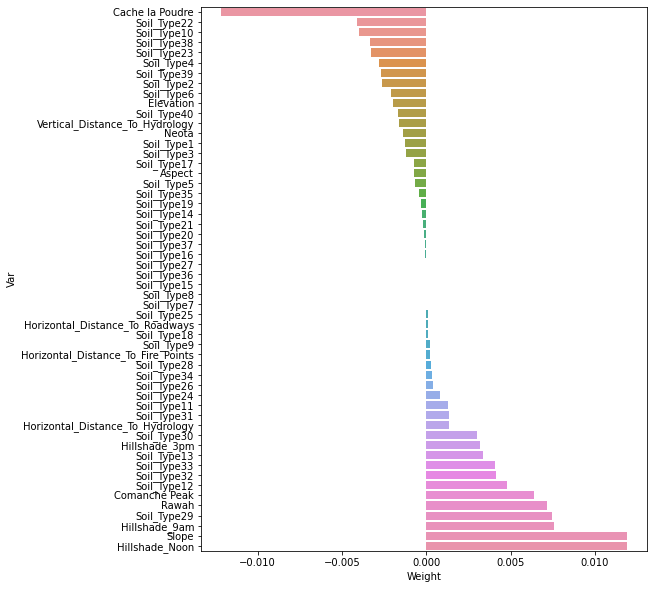

In [12]:
logWeights = pd.Series(lr_clf.coef_[0], index = forestDF.columns)
logWeights = pd.DataFrame({'Var':logWeights.index, 'Weight':logWeights.values})
logWeights = logWeights.sort_values('Weight')
plt.figure(figsize=(8, 10))
sns.barplot(x='Weight', y = 'Var', data = logWeights)

We decided to leverage Random Forest to eliminate some of the variables included in the model, to see if there is an increase in performance in a simpler model.

In [13]:
# Feature Importance Graph
# Takes about five minutes
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(X, Y)

RandomForestRegressor(n_estimators=20)

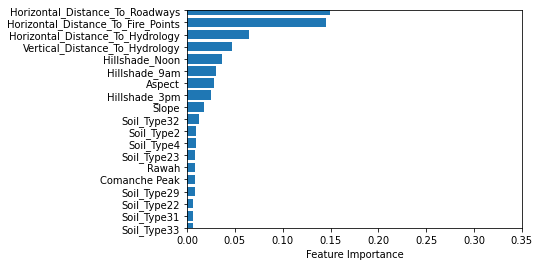

In [14]:
sort = rf.feature_importances_.argsort()
plt.barh(forestDF.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.axis([0, 0.35, 34, 52])
plt.show()

In [15]:
forestDF.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah', 'Neota', 'Comanche Peak',
       'Cache la Poudre', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

Based on the importance output, we decided to build a simplified model on:

*   Elevation
*   Horizontal Distance to Fire Points
*   Soil Type: 32, 4, 2, 23, 29, 33, 31, 22
*   Horizontal Distance to Roadways
*   Wilderness Area: Comanche Peak, Rawah
*   Horizontal Distance To Hydrology
*   Hillshade noon
*   Aspect
*   Slope




In [16]:
forestDF_new = pd.DataFrame().assign(
                treeType=Y, 
                Elevation=forestDF['Elevation'], 
                Horizontal_Distance_To_Fire_Points=forestDF['Horizontal_Distance_To_Fire_Points'],
                Soil_Type32=forestDF['Soil_Type32'],
                Soil_Type4=forestDF['Soil_Type4'],
                Soil_Type2=forestDF['Soil_Type2'],
                Soil_Type23=forestDF['Soil_Type23'],
                Soil_Type29=forestDF['Soil_Type29'],
                Soil_Type33=forestDF['Soil_Type33'],
                Soil_Type31=forestDF['Soil_Type31'],
                Soil_Type22=forestDF['Soil_Type22'],
                Horizontal_Distance_To_Roadways=forestDF['Horizontal_Distance_To_Roadways'],
                Comanche_Peak=forestDF['Comanche Peak'], 
                Rawah=forestDF['Rawah'], 
                Horizontal_Distance_To_Hydrology=forestDF['Horizontal_Distance_To_Hydrology'],
                Hillshade_Noon=forestDF['Hillshade_Noon'],
                Aspect=forestDF['Aspect'],
                Slope=forestDF['Slope']
                                                      )


In [17]:
# Assign specific features to two different variables
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

In [18]:
# Re-creating logistic regression object
lr_clf = LogisticRegression(penalty = 'l2', C = 1.0, class_weight = None)

In [19]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6134695317676824
Confusion Matrix 
 [[39362 20007]
 [24909 31925]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.6098723785100213
Confusion Matrix 
 [[39081 20420]
 [24914 31788]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.6112837017977161
Confusion Matrix 
 [[39122 20362]
 [24808 31911]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.6128843489410772
Confusion Matrix 
 [[39096 20177]
 [24807 32123]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.613254391022607
Confusion Matrix 
 [[39276 20145]
 [24796 31986]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.6134867430272885
Confusion Matrix 
 [[39352 20268]
 [24646 31937]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.6130564615371376
Confusion Matrix 
 [[39343 20419]
 [24545 31896]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.6136846725127578
Confusion Matrix 
 [[39091 20518]
 [24373 32221]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.6100358854762786
Confusion Matrix 
 [[39249 20309]
 [25006 31639]]
****Iteration 9 ****
Accuracy 0.6113009130573221
Confusion Matrix 
 [[39212 20261]
 [24907 31823]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

## Interpret Feature Importance 30

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Looking at weights of the model

In [20]:
weights = lr_clf.coef_.T
varNames = forestDF_new.columns
for coef, name in zip(weights, varNames):
    print(name, 'has weight of', coef[0])

treeType has weight of -0.001772942701855985
Elevation has weight of -0.0006319982583176873
Horizontal_Distance_To_Fire_Points has weight of 0.002625401866554508
Soil_Type32 has weight of 0.0011821902897051278
Soil_Type4 has weight of -0.0007623341088771443
Soil_Type2 has weight of 7.867758699493701e-05
Soil_Type23 has weight of 0.007840393144071627
Soil_Type29 has weight of 0.009587692350575454
Soil_Type33 has weight of 0.003930077322626156
Soil_Type31 has weight of 0.0002147955189747333
Soil_Type22 has weight of 0.001954348469934701
Horizontal_Distance_To_Roadways has weight of -0.0003943261261441772
Comanche_Peak has weight of 0.0017539721754233429
Rawah has weight of -0.0032898979343104666
Horizontal_Distance_To_Hydrology has weight of -0.00034483636134428913
Hillshade_Noon has weight of -0.0007055257387233523
Aspect has weight of -0.00031440751454800414
Slope has weight of -0.0007427726585710994


### Scaling the weights for interpretability

In [21]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty = 'l2', C = 0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices], y_hatS)
conf = mt.confusion_matrix(Y[test_indices], y_hatS)
print('accuracy:', acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T, forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

accuracy: 0.7555312685558893
[[44249 15224]
 [13184 43546]]
Elevation has weight of -1.5494885189466914
Cache la Poudre has weight of -1.0302897154973043
Soil_Type1 has weight of -0.5534460163657446
Soil_Type2 has weight of -0.44584634348220864
Soil_Type4 has weight of -0.4235191392562621
Soil_Type5 has weight of -0.3947602167628893
Soil_Type14 has weight of -0.313477259640599
Soil_Type39 has weight of -0.29053714550321014
Soil_Type38 has weight of -0.22464848746466853
Soil_Type3 has weight of -0.22390691875151167
Soil_Type35 has weight of -0.17703019451856955
Soil_Type40 has weight of -0.15943927404547073
Soil_Type17 has weight of -0.15861922708961151
Soil_Type10 has weight of -0.14728290721994822
Soil_Type37 has weight of -0.12685376689588335
Soil_Type21 has weight of -0.11540915414573055
Soil_Type22 has weight of -0.10553569426671902
Hillshade_3pm has weight of -0.10469419288959689
Aspect has weight of -0.03455391453617095
Soil_Type6 has weight of -0.02947333881156911
Soil_Type23 ha

### Plotting weights (scaled weights)

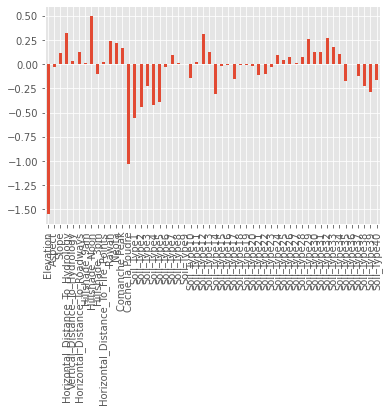

In [22]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0], index = forestDF.columns)
weights.plot(kind = 'bar')
plt.show()

The weights from the logistic regression model help us identify the importance of the various features. Having so many differnet features, it can be nice to see which ones impact the classification more so than others. This way, we can use those of utomst importance to create a better/more accurate model. 

We can see from the graph these weights for the various features quite nicely. The graph shows us that 'Elevation' has the largest absolute value. This allows us to assume that it plays the largest role in classification, in regard to all the other features in this dataset. Cache la Poudre is the next highest value. 

We believe that certain features have higher weights due to their immediate connection with the clasification. The Spruce/Fir trees grow best in certain conditions; some of these conditions are listed in the features. We believe that elevation is a key driver in identifying whether a tree is a Spruce/Fir. Similarly, we believe that other features directly connect to Spruce/Fir - like soil type.   

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

In [23]:
# Creating Cross Validation Object - SVM
cv_CGD = StratifiedShuffleSplit(n_splits = 3, test_size = 0.2)

In [24]:
#Creating SVM using linear SGD due to large amount of data
regularize_const = 0.1
iterations = 10

svm_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept = True,
                       l1_ratio = 0.0,
                       learning_rate = 'optimal',
                       loss = 'hinge',
                       max_iter = iterations,
                       n_jobs = -1,
                       penalty = 'l2')

In [25]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]), Y[train_idx])
    y_hatSVM = svm_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy', mt.accuracy_score(Y[test_idx], y_hatSVM))
    print('Confusion Matrix \n', mt.confusion_matrix(Y[test_idx], y_hatSVM))

Accuracy 0.6866690188721462
Confusion Matrix 
 [[33237 26306]
 [10104 46556]]
Accuracy 0.6878221732657505
Confusion Matrix 
 [[33324 26219]
 [10057 46603]]
Accuracy 0.6900596370145349
Confusion Matrix 
 [[33543 26000]
 [10016 46644]]


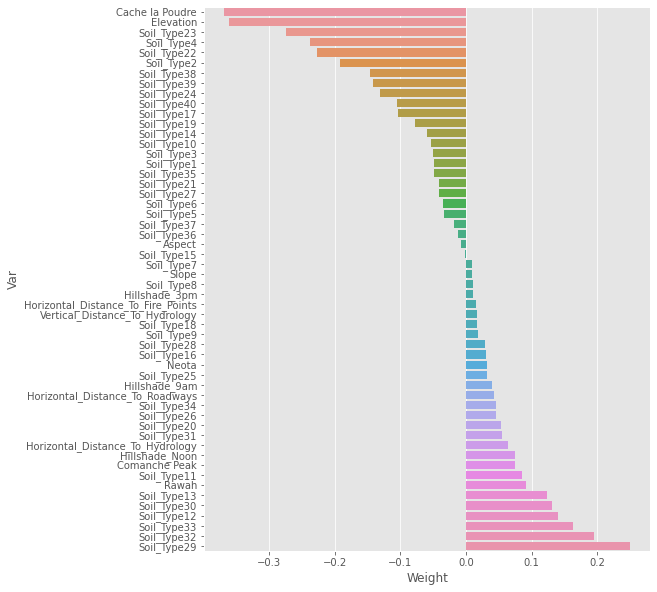

In [26]:
SVMWeights = pd.Series(svm_sgd.coef_[0], index = forestDF.columns)
SVMWeights = pd.DataFrame({'Var':SVMWeights.index, 'Weight':SVMWeights.values})
SVMWeights = SVMWeights.sort_values('Weight')
plt.figure(figsize = (8, 10))
sns.barplot(x = 'Weight', y = 'Var', data = SVMWeights)

In [27]:
# Creating SVM using logistic SGD due to large amount of data
log_sgd = SGDClassifier(alpha = regularize_const,
                       fit_intercept = True,
                       l1_ratio = 0.0,
                       learning_rate = 'optimal',
                       loss = 'log',
                       max_iter = iterations,
                       n_jobs = -1,
                       penalty = 'l2')

In [28]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    log_sgd.fit(scl.fit_transform(X[train_idx]), Y[train_idx])
    y_hatSVM = log_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy', mt.accuracy_score(Y[test_idx], y_hatSVM))
    print('Confusion Matrix \n', mt.confusion_matrix(Y[test_idx], y_hatSVM))

Accuracy 0.7283288727485521
Confusion Matrix 
 [[40948 18595]
 [12974 43686]]
Accuracy 0.7270466339079026
Confusion Matrix 
 [[40869 18674]
 [13044 43616]]
Accuracy 0.7269175494608573
Confusion Matrix 
 [[40875 18668]
 [13065 43595]]


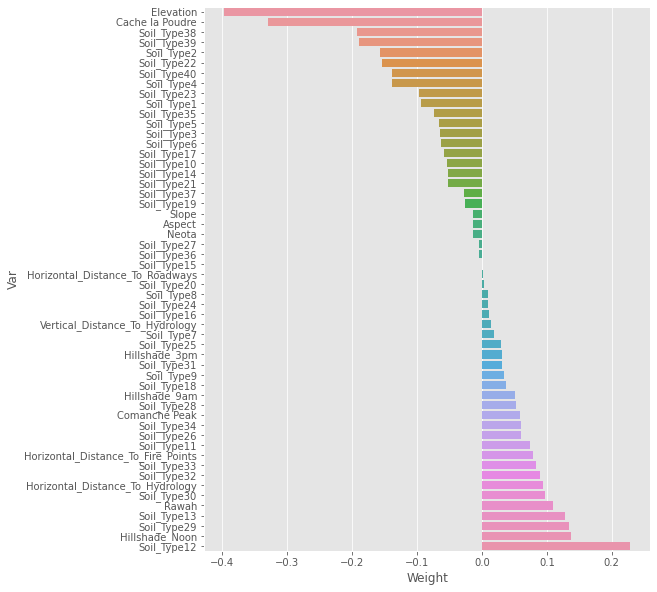

In [29]:
logSVMWeights = pd.Series(log_sgd.coef_[0],index = forestDF.columns)
logSVMWeights = pd.DataFrame({'Var':logSVMWeights.index, 'Weight':logSVMWeights.values})
logSVMWeights = logSVMWeights.sort_values('Weight')
plt.figure(figsize = (8, 10))
sns.barplot(x = 'Weight', y = 'Var', data = logSVMWeights)

In [30]:
# Sub-sampling data and verifying still balanced
forestSubDF = forestFullDF.sample(10000)
forestSubDF.head()
# forestSubDF['treeType'].describe().transpose()
forestSubDF.groupby('treeType').count()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Rawah,Neota,Comanche Peak,Cache la Poudre,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
treeType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070,5070
1,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930,4930


In [31]:
# Creating and Running SVM model on smaller dataframe
if 'treeType' in forestSubDF:
    ySub = forestSubDF['treeType'].values
    del forestSubDF['treeType']
    xSub = forestSubDF.values

In [33]:
num_cv_iter = 3
num_instances = len(Y)
cv_Log = ShuffleSplit(n_splits = num_cv_iter, test_size = 0.2)

In [34]:
for train_indices, test_indices in cv_Log.split(xSub, ySub):
    X_train = xSub[train_indices]
    Y_train = ySub[train_indices]
    X_test = xSub[test_indices]
    Y_test = ySub[test_indices]
X_train_scaled = sclObj.transform(X_train)
X_test_scaled = sclObj.transform(X_test)

In [35]:

svm_clf = SVC(C = 0.5,
             kernel = 'rbf',
             degree = 3,
             gamma = 'auto')

In [36]:
# Results
svm_clf.fit(X_train_scaled,Y_train)
y_hatSVM = svm_clf.predict(X_test_scaled)
print('Accuracy', mt.accuracy_score(Y_test, y_hatSVM))
print('Confusion Matrix \n', mt.confusion_matrix(Y_test, y_hatSVM))

Accuracy 0.763
Confusion Matrix 
 [[733 277]
 [197 793]]


In [37]:
# Support Vector shape:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_)

(4910, 54)
(4910,)
[2474 2436]


In [38]:
forestTested = forestSubDF.iloc[train_indices]
forestSupport = forestTested.iloc[svm_clf.support_,:]
forestSupport['treeType'] = ySub[svm_clf.support_]
forestSubDF['treeType'] = ySub

<ipython-input-38-24464350875f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  forestSupport['treeType'] = ySub[svm_clf.support_]


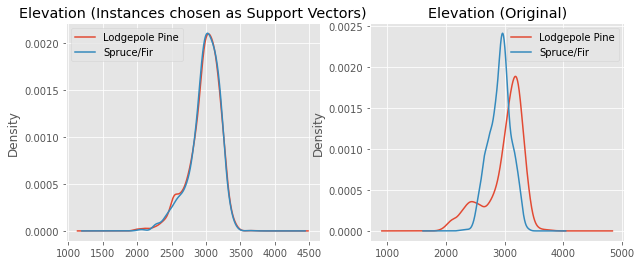

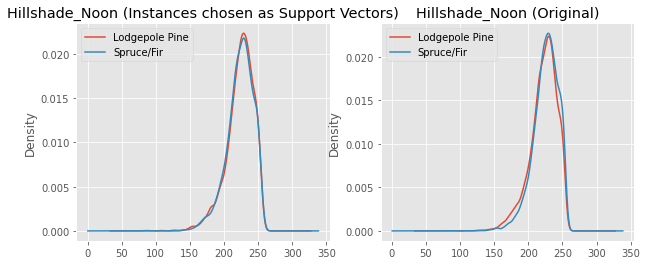

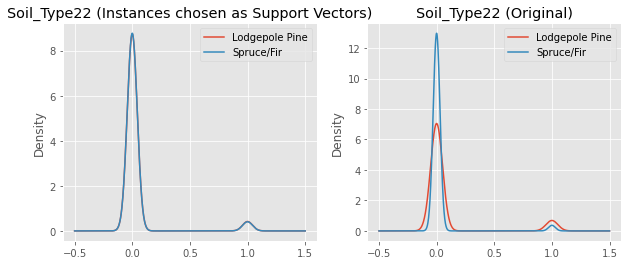

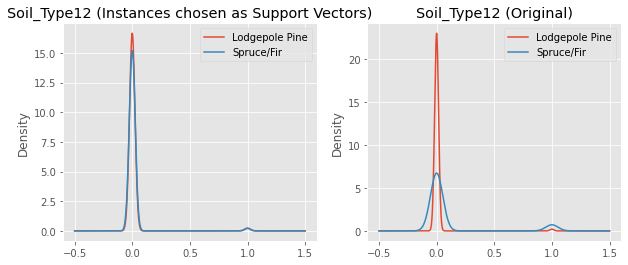

In [39]:
forestGroupSupport = forestSupport.groupby(['treeType'])
forestGroup = forestSubDF.groupby(['treeType'])

vars_to_plot = ['Elevation', 'Hillshade_Noon', 'Soil_Type22', 'Soil_Type12']

for v in vars_to_plot:
    plt.figure(figsize = (10, 4))
    plt.subplot(1, 2, 1)
    ax = forestGroupSupport[v].plot.kde()
    plt.legend(['Lodgepole Pine', 'Spruce/Fir'])
    plt.title(v + ' (Instances chosen as Support Vectors)')
    
    plt.subplot(1,2,2)
    ax = forestGroup[v].plot.kde()
    plt.legend(['Lodgepole Pine', 'Spruce/Fir'])
    plt.title(v + ' (Original)')


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. 
Assess how well each model performs (use 80/20 training/testing split for your data). 
Adjust parameters of the models to make them more accurate. 
If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. 
That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

The SVM performed better than the logistic regression model. We see that the SVM gave us an accuracy score of 76%. This is a decent amount higher than the logistic score of 61%. We feel like there is still some room for improvement, but we are glad that we are seeing a higher accuracy score. 

## Interpret Support Vectors(10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

Looking at some of the support vectors that were chosen, we can see that they greatly affect the outcome of the calssification. The graphs above do a great job illustrating the change in accuracy when comparing the original and the Support Vector.  

## Model Advantages 10
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

The interpretability of Logistic Regression was fairly easy and understandable. This model also allowed for an easier way to see various accuracy scores for different train/test splits. 

The SVM model provided a better accuracy score, which shows its superiority to Logistic Regression in this particular case. And using certain plots, it is easier to visually see the outcome of the model. The SVM seemed to be slightly quicker than Logistic Regression as well. We can see that both models are decently quick to run, but the SVM is faster. 